# Assignment 5

Seth Spire

### Do all four questions.

In [1]:
import numpy as np
import pandas as pd
import pickle

### **1.** Let's review some basic matrix multiplication. 


When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [4]:
print(A@e_1)
print()
print(A@e_2)
print()
print(A@e_3)

[1 4 7]

[2 5 8]

[3 6 9]


> The 3 multiplications take the 1st, 2nd, and 3rd columns of A respectively. Looking at the definition of matrix multiplication where for every row in A, each value A_row_i in A is multiplied by x_i where i is the index as they are summed for the same row. As e_1, e_2, and e_3 all only have 1's and 0's, multiplication here is effectively an indicator function where a 1 keeps that column in A and a 0 leaves that column out of the summation. So e_1 multiplies the value of column 1 in each row by 1 and the rest are multiplied by 0, and similarly for e_2 and e_3

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [5]:
u = np.ones(3)

In [6]:
print(A@u)

[ 6. 15. 24.]


> As all the values of u are 1, this keeps all of the values from A in the summations, so 6 is the sum of row 1 in A, 15 is the sum of row 2 in A, and 24 is the sum of row 3 in A. Looking at the definition of matrix multiplication, x_i is 1 throughout which is why all values of A are kept in there relative row summations.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [7]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
print(A@x)

[-2  4 11]


> A times x yields x exactly. Nothing changes in x, which is why A in this case is called the identity matrix as it does not change what is multiplied by it (x maintains its identity). This is the same for every vector that an identity matrix is multiplied by: the result is the same as the original vector. Looking at the definition of matrix multiplication, the summation based on row 1 in the identity matrix multiplies value 1 in the vector by 1 and the rest by 0, the summation based on row 2 in the identity matrix multiplies value 2 in the vector by 1 and the rest by, etc. This means the summation based on row i in the identity matrix only take value i in the vector, which is why the result is the original vector.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [8]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])
print(A@x)

[11 -2  4]


> With this format of a matrix (all 1s and 0s but 1s not necessarily on the diagonal), the result is a permutation of the original vector. The values of the vector are just in a different order based on where the 1s are in each row of matrix A. In this case matrix A has 1s in the 3rd, 1st, and 2nd positions for rows 1, 2 and 3. Thus, when multiplying it takes the 3rd, 1st, and then 2nd values from matrix x in that (permuated) order.

In [9]:
A = np.array([ [0,0,1],
              [0,1,0],
              [1,0,0]])
x = np.array([-2,4,11])
print(A@x)

[11  4 -2]


> This matrix A has 1s as the diagonal as with the identity matrix but the diagonal is going the opposite direction. This leads to reversing the vector that is multiplied by it. The first row has a summation with on the last value in the vector, the 2nd row has a summation with the 2nd to last value in the vector, and so on until the last row has a summation with the only the first values in the vector.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [10]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [11]:
# e_1 = np.array([1,0,0])
# e_2 = np.array([0,1,0])
# e_3 = np.array([0,0,1])
print(A@e_1)
print()
print(A@e_2)
print()
print(A@e_3)

[0.50052958 0.02574731 0.47372311]

[0.24049286 0.39251588 0.36699127]

[0.18358131 0.37907577 0.43734292]


> In this case with viewing this as a Markov chain transition matrix, the state of e_1 is '1' as the value in position 1 of e_1 is 1 bu tthe rest are zeroes. Similarly , the state of e_2 is '2' and the state of e_3 is '3'. After multiplying the transition matrix A by those various state vectors, we get the probabilites of what state each of those vectors will transition to.

> Multiplying by e_1 yields the first column in A, which shows us that if at e_1 (state '1'), we expect to transition and stay at state '1' about 50.1% of the time, transition to state '2' 2.5% of the time, and transition to state '3' 47.4% of the time. This carries over for e_2 and e_3 where the results are the probabilies of state e_2 and e_3 to transtiion to states '1', '2', and '3' respectively.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [12]:
# e_1 = np.array([1,0,0])
# e_2 = np.array([0,1,0])
# e_3 = np.array([0,0,1])
for x in [e_1,e_2,e_3]:
    p = x.copy()
    for n in range(5):
        p = A@p
    print(p)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


> So this multiplication of A by the vectors 5 times is forecasting to the estimate of what the probability of being at state '1', '2', or '3' is after 5 transitions. As can be seen, the probabilites for e_1, e_2, and e_3 are all close to identical. This is because the further out we are forecasting, the closer to the mean they will go as the information of that original state loses it's predictive power. 

### **2.** Let's consider a simple Markov transition matrix over two states:


$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [13]:
T = np.array([[ 1/4, 1/2],
              [ 3/4, 1/2 ]])
initial_state = np.array([1,0])
print(initial_state)

[1 0]


In [14]:
state_2 = T @ initial_state
print(state_2)

[0.25 0.75]


> Looking at the formula, state_2 = [ $$ T_{11}*initial_{1} + T_{12}*initial_{2} , T_{21}*initial_{1} + T_{22}*initial_{2} $$ ] = [$$ 0.25*1 + 0.5*0 , 0.75*1 + 0.5*0 $$] = [$$ 0.25, 0.75 $$]

> This result from code matches my calculation, and this represents the probabilites of being a certain state after 1 transition. So If we start at state '1', there is a 25% chance of transitioning to state '1' and a 75% chance of transitioning to state '2'. This is just taking column 1 from matrix T.

In [15]:
state_3 = T @ state_2
print(state_3)

[0.4375 0.5625]


> If we multiply T by state_2, we get a forecast looking 2 states (2 periods) ahead of the original initial state [1 0] where we were in state '1'. So after 2 transitions from state '1', we have a probability of being in state '1' of 43.75% and being in state '2' of 56.25%.

In [16]:
p = np.array([1,0])
for n in range(20):
    print(p)
    p = T @ p

[1 0]
[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


> By the 14th transition the state probabilities are [0.4 0.6] exactly (after whatever rounding is happening under the hood) and it does not change. However, after just 4 transitions the state probabilities are above or below those final stable values by 0.2% which is very close. In this case the forecast converges to that final state very quickly.

In [17]:
p = np.array([0,1])
for n in range(20):
    print(p)
    p = T @ p

[0 1]
[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


> Swapping the initial condition to state '2' with [0 1] does not have an affect on the long term forecast, it is still converging to the probabilites [0.4, 0.6] by about the 14th transition and already very close to that after just a few transitions. The stable convergence is dominated by the values of the transition matrix, not the initial state.

> Below is a random walk based on the transition matrix and starting at state 0

In [18]:
state = 0
sim = []
for n in range(100):
    sim.append(state)
    prob = T[:,state] # takes a column rather than row
    state = int(np.random.choice(a=[0,1], p=prob))
print(sim)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [19]:
print(np.mean(sim))

0.6


### **3.** Weather data



- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [20]:
weather_all = pd.read_csv('data/cville_weather.csv')
weather_all['rain'] = (weather_all['PRCP'] > 0).astype(int)
weather_all['DATE'] = pd.to_datetime(weather_all['DATE'])
weather_all.head()

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,rain
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,1
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN,1
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,1
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN,1
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0


In [21]:
print(weather_all['PRCP'].isna().value_counts())
print(weather_all['rain'].isna().value_counts())

PRCP
False    399
True      12
Name: count, dtype: int64
rain
False    411
Name: count, dtype: int64


> There is 12 missing values for PRCP and there does not seem to be a row for every date which will need to be handled some way. There is also the issue that 2 different stations meaning some dates have multiple values.

> I am going to drop missing PRCP values, order by date, and take the maximum of PRCP for each day, and only calculate true day-to-day transitions. This reduce our counts but only show valid data

In [22]:
weather = weather_all.dropna(subset=['PRCP'])[['DATE', 'rain']] # drop null PRCP, limit columns
weather = weather.groupby('DATE').max().reset_index() # take max rain per day
weather = weather.sort_values(by='DATE') # sort by date
print(weather.head())
print("\ntotal:", len(weather))


        DATE  rain
0 2024-01-04     1
1 2024-01-07     1
2 2024-01-08     0
3 2024-01-09     1
4 2024-01-10     1

total: 312


In [23]:
# is_transition is True if that row is a transition (is one day later than the previous row)
weather['is_transition'] = weather['DATE']-pd.Timedelta(days=1) == weather['DATE'].shift(1)
weather.head()

,DATE,rain,is_transition
0,2024-01-04,1,False
1,2024-01-07,1,False
2,2024-01-08,0,True
3,2024-01-09,1,True
4,2024-01-10,1,True


In [24]:
weather_states = [0, 1]
weather_transition_counts = np.zeros( (len(weather_states), len(weather_states)) )
# weather_all_tr_cts = np.zeros( (len(weather_states), len(weather_states)) ) # without excluding non day-to-day transitions

for i in range(len(weather)-1):
    from_state = weather.loc[i,'rain']
    to_state = weather.loc[i+1, 'rain']
    is_transition = weather.loc[i+1,'is_transition']

    # weather_all_tr_cts[from_state][to_state] += 1

    if is_transition:        
        weather_transition_counts[from_state][to_state] += 1

weather_row_sums = weather_transition_counts.sum(axis=1, keepdims=True) # axis=1 is rows; rows because we want sum of all counts FROM same state
# weather_row_sums_all = weather_all_tr_cts.sum(axis=1, keepdims=True)

# Normalize the transition count matrix to get proportions:
weather_tr_pr = np.divide(weather_transition_counts, 
                  weather_row_sums, 
                  out=np.zeros_like(weather_transition_counts),
                  where=weather_row_sums!=0)
# weather_tr_pr_all = np.divide(weather_all_tr_cts, 
#                   weather_row_sums_all, 
#                   out=np.zeros_like(weather_all_tr_cts),
#                   where=weather_row_sums_all!=0)

# print("Excluding non day-to-day transitions:")
print(pd.DataFrame(weather_tr_pr, index=["From: NO Rain", "      Rain"], columns=["To:   NO Rain", "Rain"]))
# print("With non day-to-day transitions:")
# print(pd.DataFrame(weather_tr_pr_all, index=["From: NO Rain", "      Rain"], columns=["To:   NO Rain", "Rain"]))

               To:   NO Rain      Rain
From: NO Rain       0.723684  0.276316
      Rain          0.396226  0.603774


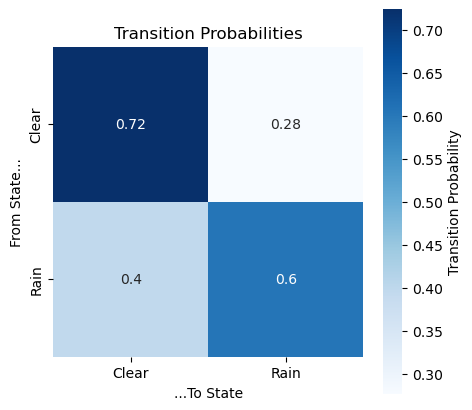

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(weather_tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=['Clear', 'Rain'],
            yticklabels=['Clear', 'Rain'],
            cbar_kws={'label': 'Transition Probability'},
            annot=True)

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

> Based on my Markov chain, there is a 27.6% chance of rain if it was not rainy yesterday, but a 60.3% chance of rain if it did rain yesterday.

In [26]:
clear_state = np.array([1,0])
clear_forecast = pd.DataFrame({'initial': clear_state}, index=['Clear', 'Rain'])
cur_state = clear_state.copy()
for i in range(2, 20):
    cur_state = cur_state @ weather_tr_pr
    clear_forecast[f'day {i}'] = cur_state
clear_forecast

,initial,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,day 10,day 11,day 12,day 13,day 14,day 15,day 16,day 17,day 18,day 19
Clear,1,0.723684,0.633202,0.603573,0.593871,0.590694,0.589654,0.589313,0.589202,0.589165,0.589153,0.589149,0.589148,0.589147,0.589147,0.589147,0.589147,0.589147,0.589147
Rain,0,0.276316,0.366798,0.396427,0.406129,0.409306,0.410346,0.410687,0.410798,0.410835,0.410847,0.410851,0.410852,0.410853,0.410853,0.410853,0.410853,0.410853,0.410853


In [27]:
rain_state = np.array([0,1])
rain_forecast = pd.DataFrame({'initial': rain_state}, index=['Clear', 'Rain'])
cur_state = rain_state.copy()
for i in range(2, 20):
    cur_state = cur_state @ weather_tr_pr
    rain_forecast[f'day {i}'] = cur_state
rain_forecast

,initial,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,day 10,day 11,day 12,day 13,day 14,day 15,day 16,day 17,day 18,day 19
Clear,0,0.396226,0.525974,0.568461,0.582373,0.586929,0.588421,0.588909,0.589069,0.589122,0.589139,0.589145,0.589146,0.589147,0.589147,0.589147,0.589147,0.589147,0.589147
Rain,1,0.603774,0.474026,0.431539,0.417627,0.413071,0.411579,0.411091,0.410931,0.410878,0.410861,0.410855,0.410854,0.410853,0.410853,0.410853,0.410853,0.410853,0.410853


> The forecast starting at a clear day converges to having 3 consistent decimal places by the 6th transition. For the one starting at a rainy day, it does so by the 8th transition. Both are converging to the same values, and for both they converge to the same 6 decimal places after 13 transitions (to day 14).

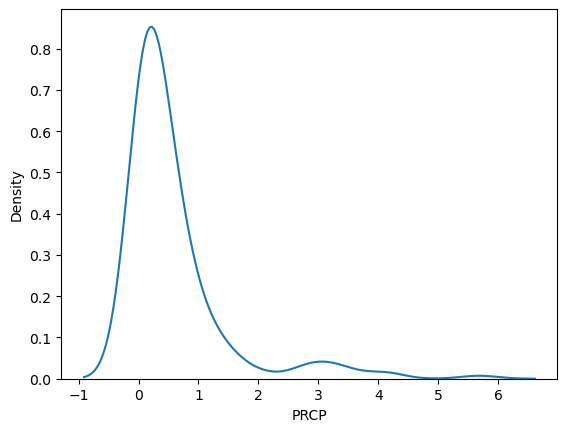

In [28]:
rainy_days = weather_all[weather_all['rain'] == 1]
sns.kdeplot(rainy_days['PRCP'])
plt.show()

> Using more information in the forecast could help. The chance of rain based on the previous day likely varies based on month of the year, so finding a way to account for that would help. We could also use more data like the previous day's temperature and pressure. I am not sure if there is a way to bake these into some sort of Markov chain though.

### **4.** Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.



- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [29]:
with open('data/taxicab.pkl', 'rb') as f:
    taxi = pickle.load(f)

In [30]:
taxi_states = set()
for trip in taxi:
    trip_states = set(trip)
    taxi_states = taxi_states.union(trip_states)
taxi_states = sorted(list(taxi_states))

In [31]:
num_states = len(taxi_states)
taxi_transition_counts = np.zeros( (num_states, num_states) )
# dict_test = {str(x): {} for x in taxi_states}

for trip in taxi:
    t = list(trip)
    for i in range(len(t)-1):
        from_state = t[i]
        to_state = t[i+1]

        from_index = taxi_states.index(from_state)
        to_index = taxi_states.index(to_state)
        
        taxi_transition_counts[from_index][to_index] += 1

row_sums = taxi_transition_counts.sum(axis=1, keepdims=True) # axis=1 is rows; rows because we want sum of all counts FROM same state

# Normalize the transition count matrix to get proportions:
taxi_tr_pr = np.divide(taxi_transition_counts, 
                  row_sums, 
                  out=np.zeros_like(taxi_transition_counts),
                  where=row_sums!=0)


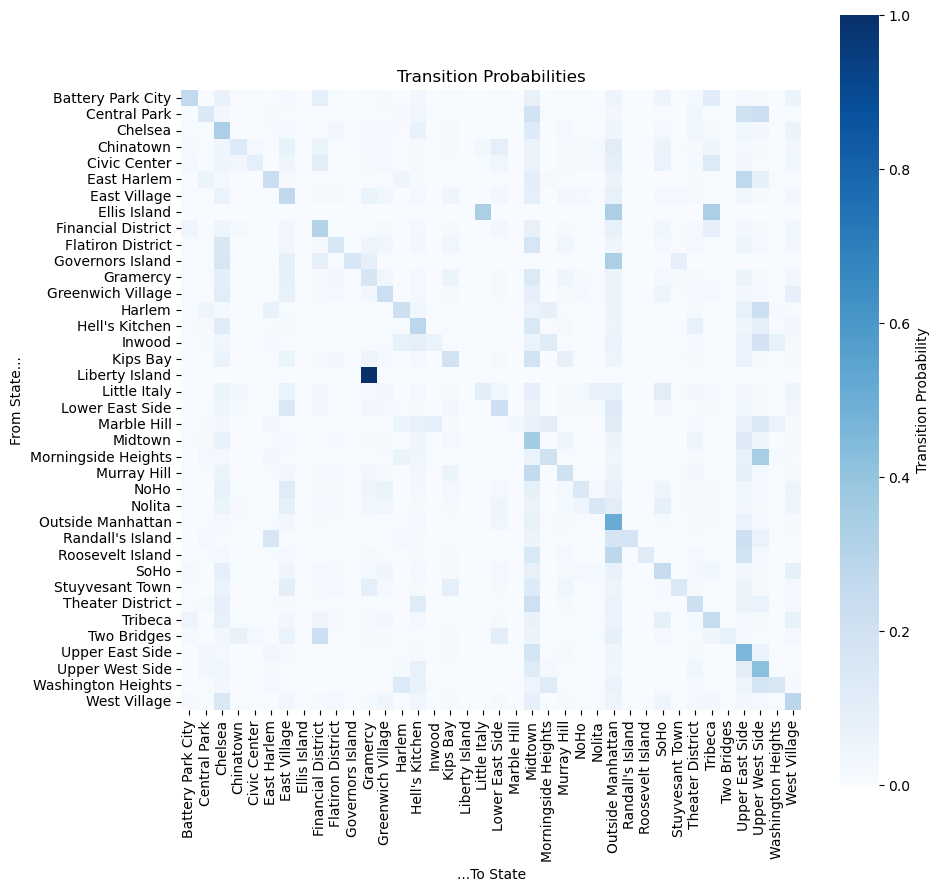

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(taxi_tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=taxi_states,
            yticklabels=taxi_states,
            cbar_kws={'label': 'Transition Probability'},)

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

> The most popular route is from Liberty Island to Gramercy as 100% of taxi cab rides starting in Liberty Island go to Gramercy in the dataset (there is only 1 instance in all the data).

> There is a clear trend along the diagonal in which a lot of cab rides stay within the same neighborhood, as some of the most common routes are staying in Outside Manhattan, staying in Upper East Side, and staying in Upper West Side.

> Some other common routes are Ellis Island to Little Italy, Ellis Island to Outside Manhattan, Ellis Island to Tribeca, Governors Island to Outside Manhattan, and Morningside Heights to Upper West Side.

> Taxi cab routes are most likely order 1 because individual rides are independent of eachother. The next person to get into the cab is choosing a destination that has nothing to do with where the cap was before they got in.

In [33]:
def run_forecast(transition_matrix, initial_state, num_transitions):
    cur_state = initial_state.copy()
    for _ in range(num_transitions):
        cur_state = cur_state @ transition_matrix
    return cur_state

In [34]:
hells_kitchen_initial = np.array([int(x == "Hell's Kitchen") for x in taxi_states])
hells_kitchen_2trips = run_forecast(taxi_tr_pr, hells_kitchen_initial, 2)
hells_kitchen_3trips = run_forecast(taxi_tr_pr, hells_kitchen_initial, 3)
hells_kitchen_5trips = run_forecast(taxi_tr_pr, hells_kitchen_initial, 5)
hells_kitchen_10trips = run_forecast(taxi_tr_pr, hells_kitchen_initial, 10)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(pd.DataFrame(index=taxi_states, data={
    "2 trips": hells_kitchen_2trips,
    "3 trips": hells_kitchen_3trips,
    "5 trips": hells_kitchen_5trips,
    "10 trips": hells_kitchen_10trips
}))
pd.reset_option('display.float_format')

                     2 trips  3 trips  5 trips  10 trips
Battery Park City    0.00862  0.00930  0.00976   0.00997
Central Park         0.01560  0.01640  0.01641   0.01615
Chelsea              0.10868  0.09719  0.08806   0.08614
Chinatown            0.00306  0.00379  0.00439   0.00460
Civic Center         0.00168  0.00210  0.00241   0.00252
East Harlem          0.00986  0.01218  0.01364   0.01382
East Village         0.02498  0.03165  0.03695   0.03862
Ellis Island         0.00000  0.00000  0.00000   0.00000
Financial District   0.01400  0.01654  0.01850   0.01919
Flatiron District    0.01562  0.01698  0.01721   0.01721
Governors Island     0.00000  0.00000  0.00000   0.00000
Gramercy             0.01526  0.01884  0.02119   0.02182
Greenwich Village    0.01699  0.02003  0.02174   0.02219
Harlem               0.01020  0.01014  0.00973   0.00947
Hell's Kitchen       0.11919  0.07520  0.05658   0.05339
Inwood               0.00088  0.00072  0.00064   0.00062
Kips Bay             0.01584  0

In [35]:
harlem_initial = np.array([int(x == "Harlem") for x in taxi_states])
harlem_prev = harlem_initial.copy()
num_transition = 1
while True:
    harlem_forecast = run_forecast(taxi_tr_pr, harlem_initial, num_transition)
    max_diff = max(abs(harlem_forecast - harlem_prev))

    if max_diff < 0.00001 or num_transition > 1000:
        print(num_transition)
        break

    harlem_prev = harlem_forecast
    num_transition += 1

19


> So it looks like no probabilities in the forecast are changing by more than 0.0001 after 15 transitions which seems like a good convergence for a stability.

In [36]:
harlem_initial = np.array([int(x == "Harlem") for x in taxi_states])
harlem_19trips = run_forecast(taxi_tr_pr, harlem_initial, 19)
harlem_20trips = run_forecast(taxi_tr_pr, harlem_initial, 20)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(pd.DataFrame(index=taxi_states, data={
    "19 trips": harlem_19trips,
    "20 trips": harlem_20trips
}).sort_values(by="19 trips", ascending=False))
pd.reset_option('display.float_format')

                     19 trips  20 trips
Midtown               0.16775   0.16775
Upper East Side       0.12185   0.12184
Outside Manhattan     0.10295   0.10295
Chelsea               0.08615   0.08615
Upper West Side       0.07855   0.07855
Hell's Kitchen        0.05332   0.05332
East Village          0.03870   0.03870
Theater District      0.03807   0.03806
West Village          0.03655   0.03655
Murray Hill           0.02850   0.02850
SoHo                  0.02398   0.02398
Greenwich Village     0.02222   0.02222
Kips Bay              0.02211   0.02211
Gramercy              0.02185   0.02185
Financial District    0.01923   0.01923
Tribeca               0.01779   0.01780
Flatiron District     0.01721   0.01721
Lower East Side       0.01614   0.01614
Central Park          0.01612   0.01612
East Harlem           0.01380   0.01380
Battery Park City     0.00998   0.00998
Harlem                0.00946   0.00946
NoHo                  0.00759   0.00759
Morningside Heights   0.00709   0.00709


> Based on this, taxicab drivers spend most of their time in Midtown with a 16.8% probability of ending up there after an arbitrary number of trips (greater than or equal to 19) starting in Harlem (and likley for any neighborhood). The next most common places are Upper East Side (12.2%), Outside Manhattan (10.3%), Chelsea (8.6%), Upper West Side (7.9%), and Hell's Kitchen (5.3%). The rest of the neighborhoods have a probability of being there after 19 (or an arbitrary high number) trips less than 5%.